<a href="https://colab.research.google.com/github/Vishveshinde/Vishveshinde/blob/main/Ipl%20score%20predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [2]:
ipl=pd.read_csv('/content/ipl_data.csv')

Dropping certain features

In [3]:
df=ipl.drop(['date','runs','wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'],axis=1)

In [10]:
X=df.drop(['total'],axis=1)

In [11]:
Y=df['total']

In [12]:
#Label encoding


In [13]:
from sklearn.preprocessing import LabelEncoder

venue_encoder=LabelEncoder()

In [14]:
batting_team_encoder=LabelEncoder()
bowling_team_encoder=LabelEncoder()
striker_encoder=LabelEncoder()
bowler_encoder=LabelEncoder()

In [16]:
#Fit and transform the categorical features with label encoding
X['venue']=venue_encoder.fit_transform(X['venue'])
X['bat_team']=batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team']=bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman']=striker_encoder.fit_transform(x['batsman'])
X['bowler']=bowler_encoder.fit_transform(X['bowler'])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#Fit the scaler on the training data and trasform both training and testing data

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Defining Neural Network

In [27]:
model=keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    #input layer
    keras.layers.Dense(512,activation='relu'),
    #512 units and relu activation
    keras.layers.Dense(216,activation='relu'),
    #216 units adn relu activation
    keras.layers.Dense(1,activation='linear')
    #output layer with linear activation function
])

In [28]:
#Compile the model with huber loss
huber_loss=tf.keras.losses.Huber(delta=1.0)
#You can adjust the 'delta parameter as needed
model.compile(optimizer='adam',loss=huber_loss)
#Using Huber loss for regression

In [30]:
#Train the model
model.fit(X_train_scaled,Y_train,epochs=50,batch_size=64,validation_data=(X_test_scaled,Y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 55.5133 - val_loss: 22.0857
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 22.3665 - val_loss: 23.2142
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.3434 - val_loss: 22.0407
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.2331 - val_loss: 21.9692
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2896 - val_loss: 21.8999
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1452 - val_loss: 21.9334
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.2301 - val_loss: 21.9723
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 22.1758 - val_loss: 22.0423
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.0722 - val_loss: 22.0673
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 22.2681 - val_loss: 22.2800
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 22.1786 - val_loss: 21.8553
Epoch 12/50
832/832 ━━━━━━━

<Axes: >

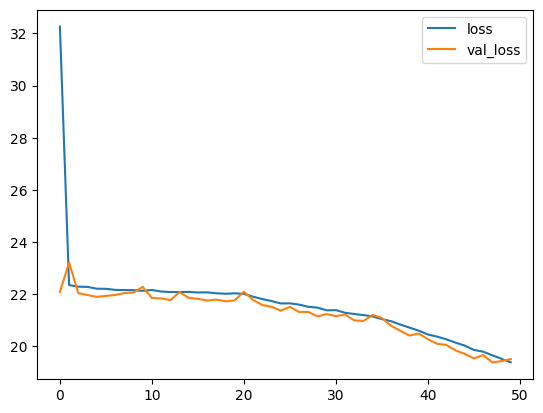

In [31]:
model_losses=pd.DataFrame(model.history.history)
model_losses.plot()

In [32]:
predictions=model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(Y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


20.005975845293424